# Analysis

## Initialize

Import the analysis core code, set `matplotlib` to plot inline and run nosetests (Warnings are exepcted due to pyne not being QA complient)

In [1]:
import analysis.core as wdt
%matplotlib inline
!nosetests -v

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)
analysis_tests.TestClass.test_data_frames_mean ... ok
analysis_tests.TestClass.test_data_frames_mean_rel ... ok
analysis_tests.TestClass.test_data_frames_stdev ... ok
analysis_tests.TestClass.test_data_frames_stdev_rel ... ok
analysis_tests.TestClass.test_histogram ... ok
analysis_tests.TestClass.test_histogram_stdev ... ok

----------------------------------------------------------------------
Ran 6 tests in 2.762s

OK


### Set Base Directory
Set the abslute location of the `wdt_runs` repo.

Ex: if the absolute path of the repo is `/home/josh/repos/wdt_runs/`:

```base_dir = '/home/josh/repos/'```

In [2]:
base_dir = '/home/josh/repos/'

## Analysis Tools

The `Analyzer` class is the workhorse of this data analysis, it initializes:

`wdt.Analyzer(st_vals, wdt_vals, base_dir, base_st=0.1, base_wdt=0.1)`

In [3]:
st_vals = [0.1, 0.075,0.05]
wdt_vals = [0.1,0.2,0.3,0.4]
my_analyzer = wdt.Analyzer(st_vals, wdt_vals, base_dir)

<module 'matplotlib.pyplot' from '/home/josh/lib/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

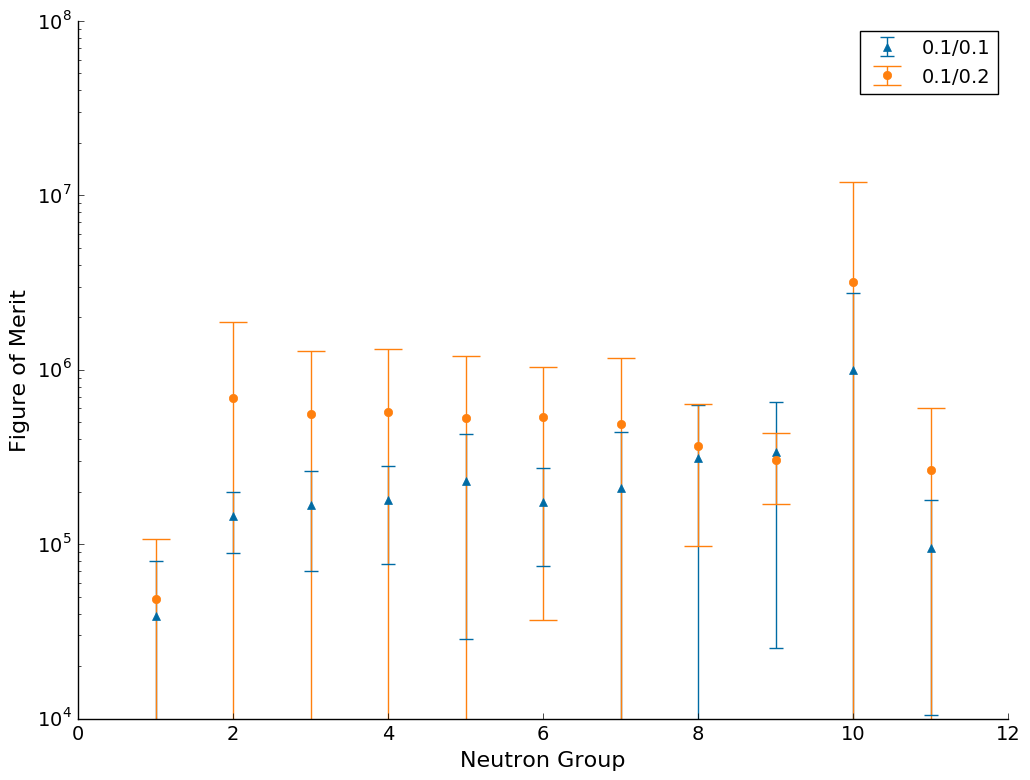

In [4]:
my_analyzer.plot('INF_FLX',0.1,0.2)

In [ ]:
inf_flx = np.array([[  1.000000000000000e-01,   1.000000000000000e-01,
          7.770320910167979e+04,   2.881213874510786e+05,
          3.330854271034978e+05,   3.592197619268558e+05,
          4.592693483665632e+05,   3.477350076252737e+05,
          4.184873026703300e+05,   6.216568624381045e+05,
          6.786077461936653e+05,   1.989227129552983e+06,
          1.892225239857909e+05,   5.762335706415824e+06,
          1.000000000000000e+00],
       [  7.500000000000000e-02,   1.000000000000000e-01,
          5.738285268311050e+04,   8.107939221184613e+05,
          1.843325556255931e+06,   1.199306611991202e+06,
          1.752141958238667e+06,   9.032851511593399e+05,
          5.917315373873878e+05,   6.409204463172283e+05,
          1.469276557268143e+06,   5.956149806447506e+05,
          3.825529728095573e+05,   1.024633254687378e+07,
          1.778156127812103e+00]])
np.allclose(inf_flx,my_analyzer.data_frame('INF_FLX',rel=False,
                                            mean=True,style=False).as_matrix())

In [ ]:
my_analyzer.data_frame('INF_FLX',rel=False,
                                            mean=True,style=False).as_matrix()

In [ ]:
np.set_printoptions(precision=15)

In [ ]:
np.around(my_analyzer.data_frame('INF_FLX',rel=False,
                                            mean=True,style=False).as_matrix(),9)

In [ ]:
param = 'INF_SCATT0'
get_mean = False
df=my_analyzer.data_frame(param,rel=False,mean=get_mean,style=False).sort_values(by='Ratio', ascending = not get_mean)[:5]
df2 = pd.concat([df.ix[:,0:2], df.ix[:,-1:]], axis=1)
print df2.to_latex(index=False).replace('\n', ' ')

In [ ]:
plt = my_analyzer.plot_cpu(0.1)

In [ ]:
my_analyzer.histogram(['INF_FLX','INF_TOT','INF_ABS','INF_CAPT','INF_FISS','INF_SCATT0','INF_SCATT1'],mean=True)

In [ ]:
my_analyzer.plot('INF_FLX',[0.1],[0.6])
plt.title('Infinite flux FOM by neutron group for ST threshold 0.1, WDT threshold 0.6', fontsize=16)

In [ ]:
my_analyzer.plot('INF_FLX',[0.1],[0.6])
plt.title('Infinite total cross-section FOM by neutron group for ST threshold 0.1, WDT threshold 0.6', fontsize=14)

In [ ]:
my_analyzer.plot('INF_ABS',[0.1],[0.6])
plt.title('Infinite absorption cross-section FOM by neutron group for ST threshold 0.075, WDT threshold 0.3', fontsize=13)

NameError: name 'plt' is not defined

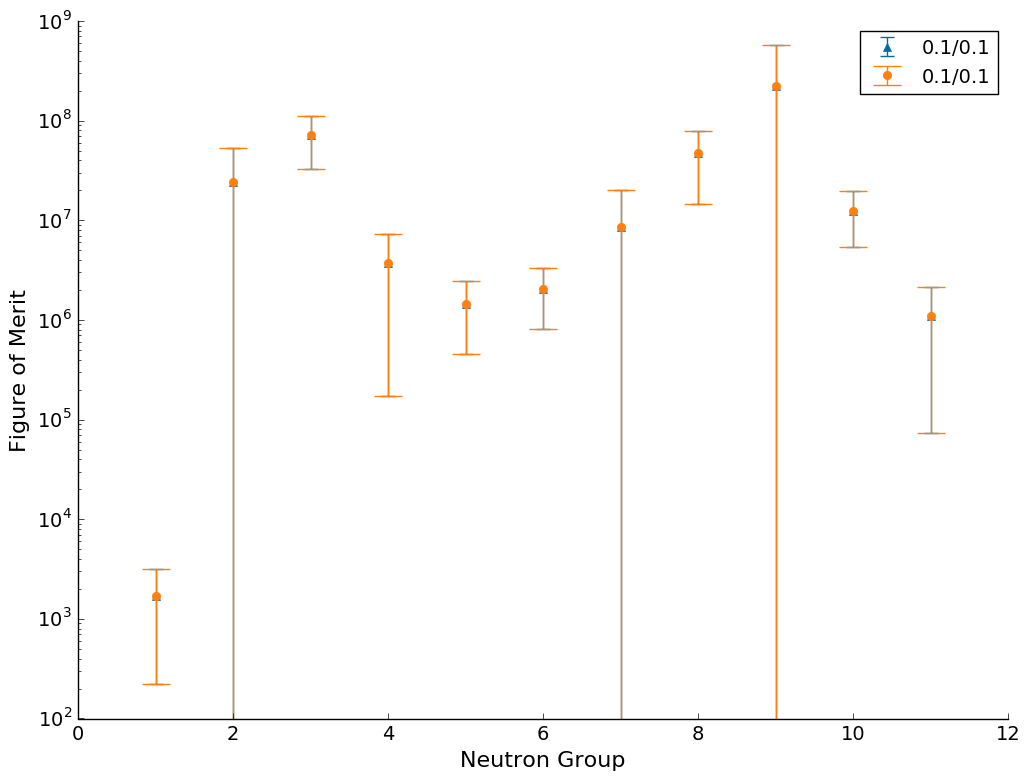

In [6]:
my_analyzer.plot('INF_CAPT',[0.1],[0.1])
plt.title('Infinite capture cross-section FOM by neutron group for ST threshold 0.075, WDT threshold 0.3', fontsize=14)